In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,r2_score

df = pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [349]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [350]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [351]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [352]:
df.shape

(545, 13)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [354]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [355]:
df.duplicated().sum()

np.int64(0)

In [356]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


There is no duplicate rows or missing values in this data set.

<Axes: >

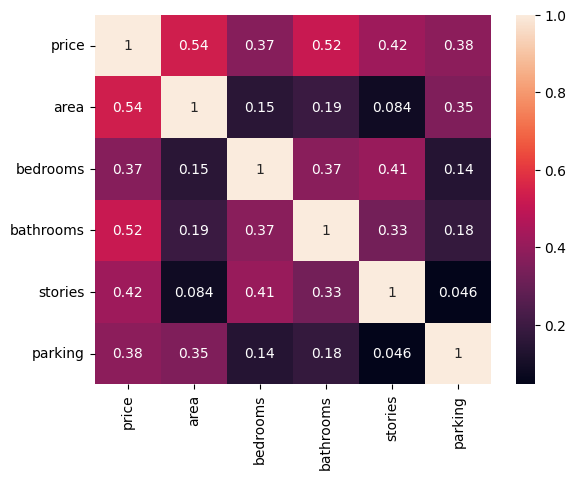

In [357]:
r = df.corr(numeric_only=True)
sns.heatmap(r,annot=True)

In [358]:
# Input and output data split.

x = df.drop(columns='price')
y = df['price']

In [359]:
# Log transformation

y = np.log(y)


In [360]:
x.ndim

2

In [361]:
y.ndim

1

In [362]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


<Axes: xlabel='area', ylabel='price'>

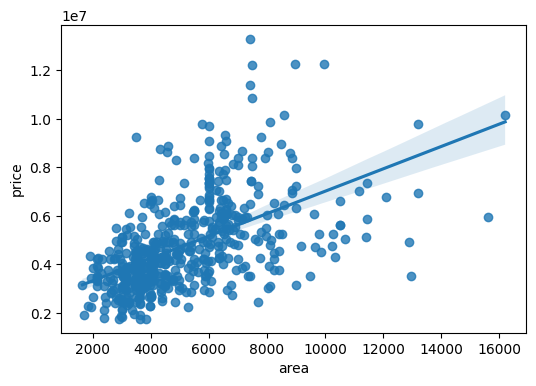

In [363]:
# Area vs Price linear relation

plt.figure(figsize=(6,4))
sns.regplot(x='area',y='price',data=df)

In [364]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


<Axes: xlabel='bathrooms', ylabel='price'>

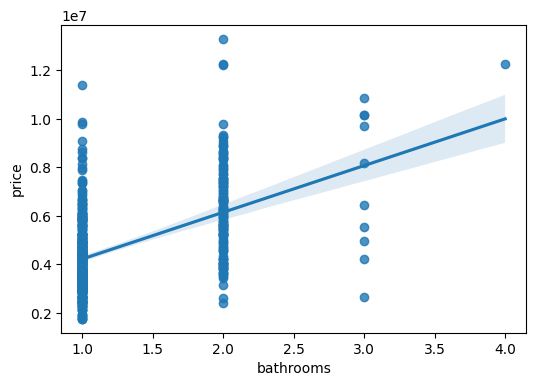

In [365]:
# bathrooms vs Price linear relation

plt.figure(figsize=(6,4))
sns.regplot(x='bathrooms',y='price',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

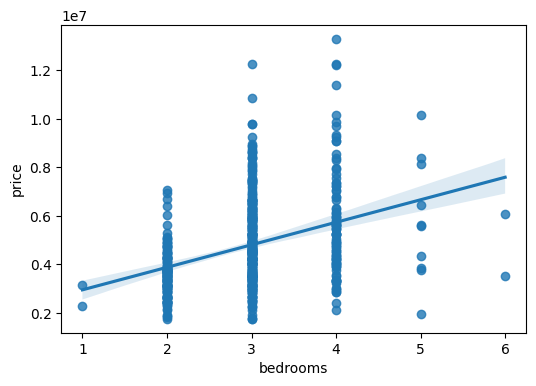

In [366]:
# Bedrooms vs Price linear relation

plt.figure(figsize=(6,4))
sns.regplot(x='bedrooms',y='price',data=df)

<Axes: xlabel='stories', ylabel='price'>

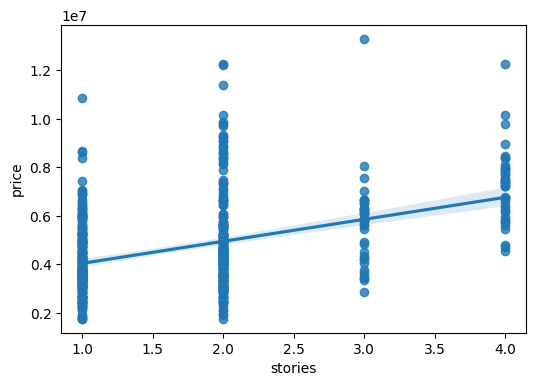

In [367]:
# stories vs Price linear relation

plt.figure(figsize=(6,4))
sns.regplot(x='stories',y='price',data=df)

<Axes: xlabel='parking', ylabel='price'>

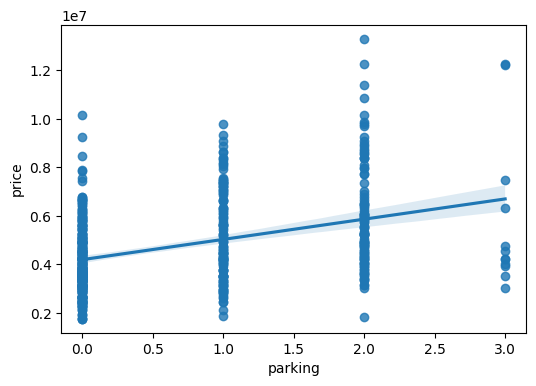

In [368]:
# parking vs Price linear relation

plt.figure(figsize=(6,4))
sns.regplot(x='parking',y='price',data=df)

In [369]:
# Feature encoding

one = OneHotEncoder(sparse_output=False)

cat_cols = [i for i in x.select_dtypes(include='object').columns]

encoded = one.fit_transform(x[cat_cols])
enc_df = pd.DataFrame(encoded,columns=one.get_feature_names_out(cat_cols),index=x.index)
enc_df

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [370]:
x.dtypes

,0
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object
parking,int64


In [371]:
x2 = x.select_dtypes(include='number')
x2



,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [372]:
# Here x2 and enc_df are the data frames to be inner joined.

# Adding common column to perform inner join.

x2 = x2.reset_index()
enc_df = enc_df.reset_index()

In [373]:
# Now performing inner join.

enc_df = pd.merge(enc_df,x2,on='index',how='inner')
enc_df

,index,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,...,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area,bedrooms,bathrooms,stories,parking
0,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,7420,4,2,3,2
1,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,8960,4,4,4,3
2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,9960,3,2,2,2
3,3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,7500,4,2,2,3
4,4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,7420,4,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,3000,2,1,1,2
541,541,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,2400,3,1,1,0
542,542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,3620,2,1,1,0
543,543,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,2910,3,1,1,0


In [374]:
# Train and Test data split

x_train,x_test,y_train,y_test = train_test_split(enc_df,y,test_size=0.3,random_state=0)

In [375]:
x_train.shape

(381, 21)

In [376]:
x_test.shape

(164, 21)

In [377]:
y_train.shape

(381,)

In [378]:
y_test.shape

(164,)

In [379]:
# Feature scaling ( In Regression based problems Feature scaling is optional. )

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [380]:
# Model Creation

# Linear Regression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [381]:
# Prediction

y_pred = model.predict(x_test)

In [382]:
# Performance Evaluation

mean_absolute_percentage_error(y_test,y_pred)*100

0.367438255505274

In [383]:
r2_score(y_test,y_pred)*100

95.75388527705316

In [384]:
# Actual vs prdicted value data frame with residual.


data = {
    "Actual":y_test,
    "Predicted":y_pred,
    "Residual":y_test-y_pred
}

res = pd.DataFrame(data)
res

,Actual,Predicted,Residual
239,15.338301,15.380154,-0.041854
113,15.621009,15.685004,-0.063996
325,15.203678,15.171636,0.032043
66,15.751370,15.784571,-0.033200
479,14.893920,14.829746,0.064174
...,...,...,...
477,14.893920,14.833356,0.060564
505,14.791202,14.779329,0.011873
347,15.159941,15.122761,0.037180
224,15.375758,15.446306,-0.070548


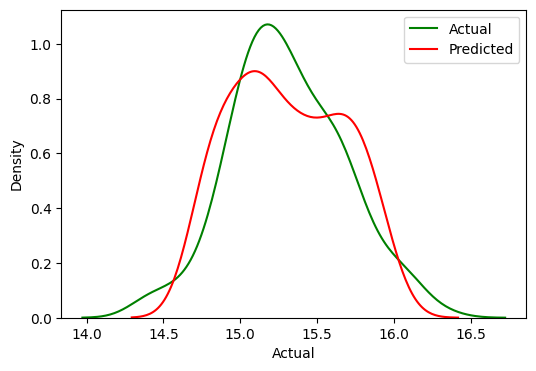

In [385]:
# Visualization of Actual vs predicted value difference.


plt.figure(figsize=(6,4))
sns.kdeplot(x='Actual',data=res,color='green',label="Actual")
sns.kdeplot(x='Predicted',data=res,color='red',label='Predicted')
plt.legend()
plt.show()

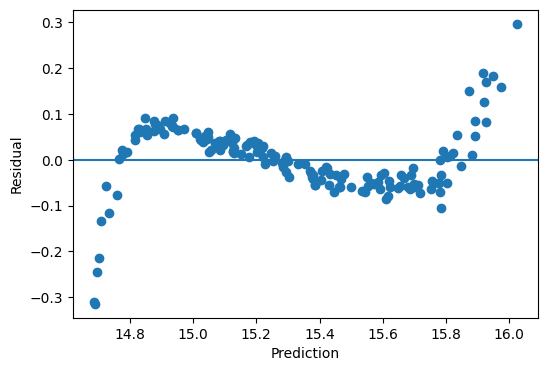

In [386]:
# Residual plot

plt.figure(figsize=(6,4))
plt.scatter('Predicted',"Residual",data =res)
plt.axhline(0)
plt.xlabel('Prediction')
plt.ylabel("Residual")
plt.show()

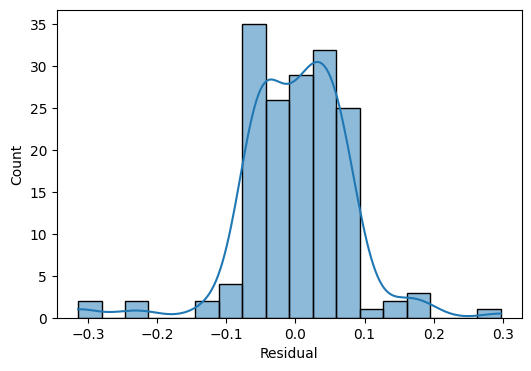

In [392]:
# Residual distribution -- Histogram

plt.figure(figsize=(6,4))
sns.histplot(res['Residual'],kde=True)
plt.xlabel('Residual')
plt.show()